# THE SPARKS FOUNDATION_INTERNSHIP
(Data Science and Business Analytics)

## Perform Exploratory Data Analysis On Dataset "Indian Premier League"
- As a sport analysts,find out the most successful teams,players and factors contributing win or loss of a team
- Suggest a teams or players a company should endorse for its products

### AUTHOR - M.Aizaz Ud Din

##### Importing all libraries required in this notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sa
import matplotlib.pyplot as plt


##### Reading data

In [2]:
data=pd.read_csv("D:\Artifical Intelligent\Dataset\Indian Premier League\matches.csv")

In [3]:
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


###### Droping Columns

In [5]:
new_data=data.drop(["id","city","date","venue","result","umpire1","umpire2","umpire3"],axis=1)

In [6]:
new_data.head()

,season,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
0,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,35,0,Yuvraj Singh
1,2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,0,Rising Pune Supergiant,0,7,SPD Smith
2,2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,0,Kolkata Knight Riders,0,10,CA Lynn
3,2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,0,Kings XI Punjab,0,6,GJ Maxwell
4,2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,0,Royal Challengers Bangalore,15,0,KM Jadhav


In [7]:
new_data.shape

(756, 10)

In [8]:
new_data.nunique()

season              12
team1               15
team2               15
toss_winner         15
toss_decision        2
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
dtype: int64

##### Checking missing value 

In [9]:
new_data.isnull().sum()

season             0
team1              0
team2              0
toss_winner        0
toss_decision      0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
dtype: int64

##### Fill the Missing Values

In [10]:
new_data["winner"].fillna("draw",inplace= True)
new_data["player_of_match"].fillna("match_draw",inplace= True)

In [11]:
new_data["winner"].isnull().sum()
new_data["player_of_match"].isnull().sum()

0

## Find out Most Successful Teams

In [12]:
new_data["winner"].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
draw                             4
Name: winner, dtype: int64

<AxesSubplot:>

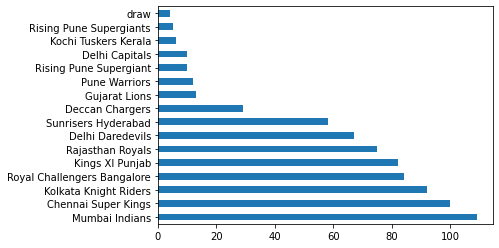

In [18]:
new_data["winner"].value_counts().plot(kind="barh")

In above code show that Most Successful Teams is Mumbai Indians wins 109 Matches

### Find out Most Successful Players

In [19]:
new_data["player_of_match"].value_counts().head(10)

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
RG Sharma         17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64

<AxesSubplot:>

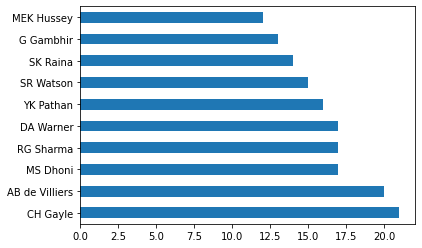

In [20]:
new_data["player_of_match"].value_counts().head(10).plot(kind="barh")

In code Most Successful Players is CH Gayle 

### Find Out Factors contributing win or loss of a team

<AxesSubplot:>

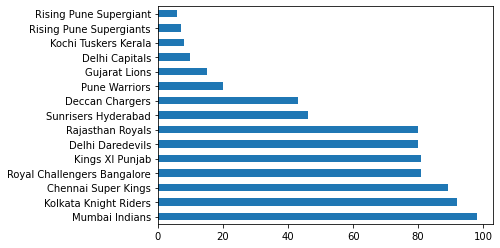

In [21]:
new_data["toss_winner"].value_counts().plot(kind="barh")

In [22]:
new_data["toss_winner"].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

Most of toss win by Mumbai Indians is 98

<AxesSubplot:ylabel='winner,toss_decision'>

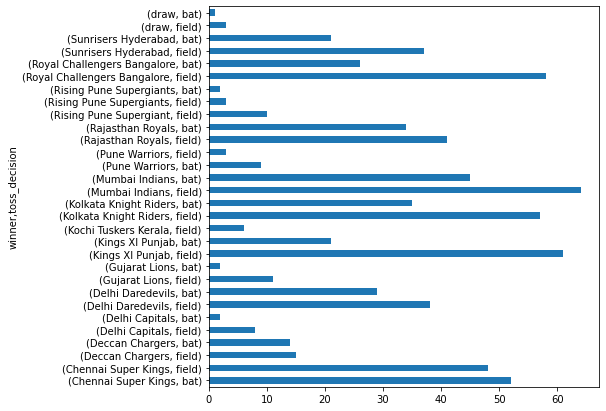

In [23]:
plt.figure(figsize=(7,7))
new_data.groupby("winner")["toss_decision"].value_counts().plot(kind="barh")

In [24]:
new_data.groupby("winner")["toss_decision"].value_counts()

winner                       toss_decision
Chennai Super Kings          bat              52
                             field            48
Deccan Chargers              field            15
                             bat              14
Delhi Capitals               field             8
                             bat               2
Delhi Daredevils             field            38
                             bat              29
Gujarat Lions                field            11
                             bat               2
Kings XI Punjab              field            61
                             bat              21
Kochi Tuskers Kerala         field             6
Kolkata Knight Riders        field            57
                             bat              35
Mumbai Indians               field            64
                             bat              45
Pune Warriors                bat               9
                             field             3
Rajasthan Royals          

In [25]:
winner=new_data["winner"]
win_by_wickets =new_data["win_by_wickets"]
toss_winner=new_data["toss_winner"]
win_by_runs = new_data["win_by_runs"]


In [26]:
Field_First_winner = new_data.winner[new_data.win_by_wickets!=0].value_counts()
print(Field_First_winner)

Kolkata Knight Riders          56
Mumbai Indians                 50
Royal Challengers Bangalore    48
Chennai Super Kings            48
Rajasthan Royals               46
Kings XI Punjab                42
Delhi Daredevils               42
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Pune Warriors                   6
Delhi Capitals                  6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64


In [27]:
Bat_first = new_data.winner[new_data.win_by_runs!=0].value_counts()
print(Bat_first)

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Delhi Capitals                  3
Rising Pune Supergiants         2
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64


<AxesSubplot:>

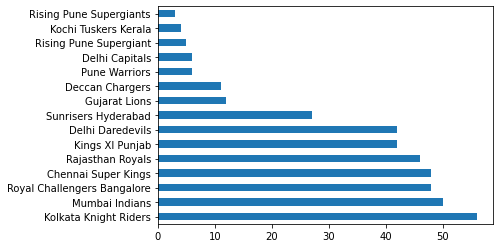

In [29]:
Field_First_winner.plot(kind="barh")

<AxesSubplot:>

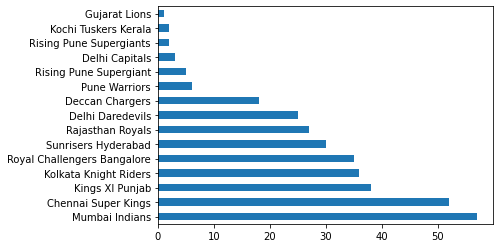

In [30]:
Bat_first.plot(kind="barh")

- In above code it is clear team which wining toss win most matches
- Team which field first win most matches

### Conclusions
- Most Successful Teams is Mumbai Indians wins 109 Matches
- Most Successful Players is CH Gayle
- Factors contributing win or loss of a team is Toss wins and choose to field first wins most Matches


## Suggest a teams or players a company should endorse for its products

In [4]:
df=pd.read_csv("D:\Artifical Intelligent\Dataset\Indian Premier League\deliveries.csv")

In [5]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
df.shape

(179078, 21)

In [7]:
df.nunique()

match_id            756
inning                5
batting_team         15
bowling_team         15
over                 20
ball                  9
batsman             516
non_striker         511
bowler              405
is_super_over         2
wide_runs             6
bye_runs              5
legbye_runs           6
noball_runs           5
penalty_runs          2
batsman_runs          8
extra_runs            7
total_runs           10
player_dismissed    487
dismissal_kind        9
fielder             499
dtype: int64

In [8]:
df["batting_team"].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [9]:
df["batting_team"].nunique()

15

In above code Rising Pune Supergiants is spelling mistake so we replace

In [10]:
df["batting_team"].replace(to_replace="Rising Pune Supergiants",value="Rising Pune Supergiant", inplace=True)
df["bowling_team"].replace(to_replace="Rising Pune Supergiants",value="Rising Pune Supergiant", inplace=True)

In [11]:
df["batting_team"].nunique()
df["bowling_team"].nunique()

14

In [12]:
df.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [13]:
len(df["batsman"].value_counts())

516

Above code show Total batsman

In [14]:
len(df["bowler"].value_counts())

405

Above code show Total bowler

In [15]:
bowl=df["batsman"].value_counts()
bowl.head(10)

V Kohli       4211
SK Raina      4044
RG Sharma     3816
S Dhawan      3776
G Gambhir     3524
RV Uthappa    3492
DA Warner     3398
MS Dhoni      3318
AM Rahane     3215
CH Gayle      3131
Name: batsman, dtype: int64

<AxesSubplot:>

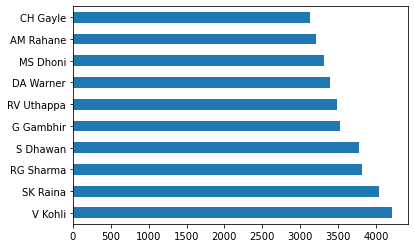

In [16]:
df["batsman"].value_counts().head(10).plot(kind="barh")

Above code show that number ball play by any batsman

In [17]:
df["bowler"].value_counts()

Harbhajan Singh     3451
A Mishra            3172
PP Chawla           3157
R Ashwin            3016
SL Malinga          2974
                    ... 
I Malhotra             6
Y Gnaneswara Rao       6
SN Khan                2
SPD Smith              2
AC Gilchrist           1
Name: bowler, Length: 405, dtype: int64

<AxesSubplot:>

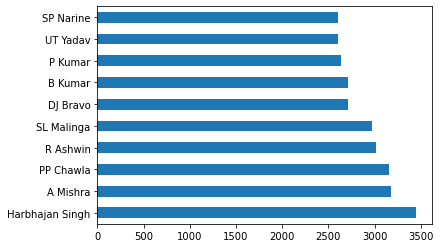

In [18]:
df["bowler"].value_counts().head(10).plot(kind="barh")

In [19]:
df["batsman_runs"].value_counts()

0    70845
1    67523
4    20392
2    11471
6     8170
3      587
5       79
7       11
Name: batsman_runs, dtype: int64

Above show that total dot balls,single,doblue,three,fours,six in a Tournament

### Now Find Top batsmen

<AxesSubplot:ylabel='batsman'>

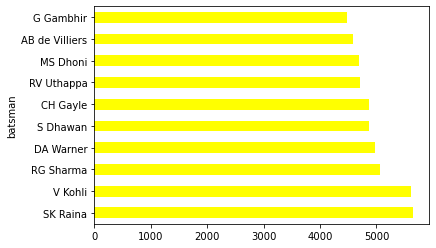

In [20]:
most_runs =df.groupby(["batsman"])["total_runs"].sum().sort_values(ascending =False)
most_runs.head(10).plot(kind="barh",color = "yellow")

In [21]:
print(most_runs.head(10))

batsman
SK Raina          5651
V Kohli           5616
RG Sharma         5057
DA Warner         4975
S Dhawan          4876
CH Gayle          4873
RV Uthappa        4703
MS Dhoni          4691
AB de Villiers    4583
G Gambhir         4485
Name: total_runs, dtype: int64


In Above code show the Top 10 Batsman who scores most runs in the Trounament

In [22]:
batsman = df["batsman"]
total_runs = df["total_runs"]
dot_ball_played=df.batsman[df.total_runs==0].value_counts()
dot_ball_played.head(10)

V Kohli       1369
S Dhawan      1319
RG Sharma     1291
CH Gayle      1236
RV Uthappa    1223
SK Raina      1221
G Gambhir     1170
DA Warner     1114
AM Rahane     1096
SR Watson     1017
Name: batsman, dtype: int64

V kohli play most dot ball

#### Most sixes

In [110]:
batsman = df["batsman"]
total_runs = df["total_runs"]
sixes=df.batsman[df.total_runs==6].value_counts()
sixes.head(10)

CH Gayle          322
AB de Villiers    211
MS Dhoni          207
SK Raina          194
RG Sharma         193
V Kohli           190
DA Warner         179
SR Watson         178
KA Pollard        174
YK Pathan         161
Name: batsman, dtype: int64

### Strike_rate

In [23]:
strike_rate=(most_runs.head(20)/bowl.head(20))*100
strike_rate.head(10)

AB de Villiers    153.946926
AM Rahane         124.665630
AT Rayudu         128.832525
BB McCullum       137.059859
CH Gayle          155.637177
DA Warner         146.409653
G Gambhir         127.270148
JH Kallis                NaN
KA Pollard               NaN
KD Karthik        133.356401
dtype: float64

Above code check strike rate of first 20 players who runs is highest

In [24]:
df["player_dismissed"].value_counts().head(10)

SK Raina      162
RG Sharma     155
RV Uthappa    153
V Kohli       143
S Dhawan      137
G Gambhir     136
KD Karthik    135
PA Patel      126
AM Rahane     116
AT Rayudu     115
Name: player_dismissed, dtype: int64

Sk Raina out most of the time 

### Find Best Bowler

#### Bowler which gives Most extra runs

<AxesSubplot:ylabel='bowler'>

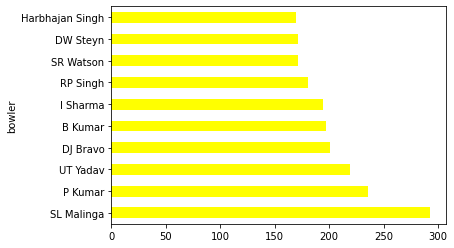

In [25]:
extra_runs=df.groupby("bowler")["extra_runs"].sum().sort_values(ascending =False)
extra_runs.head(10).plot(kind="barh",color = "yellow")

In [26]:
extra_runs.head()

bowler
SL Malinga    293
P Kumar       236
UT Yadav      219
DJ Bravo      201
B Kumar       197
Name: extra_runs, dtype: int64

Malinga give most Extra runs

#### Dot ball by Bowler

In [27]:
bowlwer = df["bowler"]

In [28]:
dot_ball = df.bowler[df.total_runs==0].value_counts()
dot_ball.head(10)

Harbhajan Singh    1244
SL Malinga         1144
B Kumar            1116
A Mishra           1108
PP Chawla          1100
P Kumar            1075
R Ashwin           1067
SP Narine          1038
DW Steyn            996
UT Yadav            942
Name: bowler, dtype: int64

Harbhajan Singh is bowl most dot ball

In [29]:
dismissal_kind =df["dismissal_kind"]


In [37]:
df["dismissal_kind"].value_counts()

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

##### Most LBW

In [65]:
lbw = df.bowler[df.dismissal_kind == "lbw"].value_counts()
lbw.head(15)

PP Chawla          16
SP Narine          16
R Ashwin           14
Rashid Khan        14
A Mishra           13
RA Jadeja          11
Sandeep Sharma     11
SL Malinga         11
JJ Bumrah           9
Z Khan              9
M Muralitharan      9
UT Yadav            9
R Sharma            8
B Kumar             8
Harbhajan Singh     8
Name: bowler, dtype: int64

##### Most Caught Out

In [111]:
caught_out =df.bowler[df.dismissal_kind == "caught"].value_counts()
caught_out.head(10)

DJ Bravo           113
SL Malinga          91
A Mishra            89
UT Yadav            89
Harbhajan Singh     84
B Kumar             84
R Vinay Kumar       82
R Ashwin            78
A Nehra             76
PP Chawla           72
Name: bowler, dtype: int64

##### Most bowled

In [112]:
bowled_out=df.bowler[df.dismissal_kind == "bowled"].value_counts()
bowled_out.head(10)

SL Malinga         63
PP Chawla          43
SP Narine          35
B Kumar            35
Harbhajan Singh    29
RA Jadeja          27
DW Steyn           26
RP Singh           25
A Mishra           25
A Nehra            23
Name: bowler, dtype: int64

##### Stumped 

In [70]:
Stumped=df.bowler[df.dismissal_kind == "stumped"].value_counts()
Stumped.head()

A Mishra           26
Harbhajan Singh    18
PP Chawla          14
PP Ojha            12
YS Chahal          12
Name: bowler, dtype: int64

##### Caught and Bowled

In [78]:
caught_bowled =df.bowler[df.dismissal_kind == "caught and bowled"].value_counts()
caught_bowled.head()

Harbhajan Singh    10
DJ Bravo            8
SP Narine           7
KA Pollard          6
A Chandila          5
Name: bowler, dtype: int64

##### Hit Wicket  

In [81]:
hit_wicket = df.bowler[df.dismissal_kind == "hit wicket"].value_counts()
hit_wicket.head()

S Sreesanth          2
JA Morkel            1
DW Steyn             1
Washington Sundar    1
NM Coulter-Nile      1
Name: bowler, dtype: int64

## Conclusions

### players a company should endorse for its products

- SK Raina ,V Kohli ,RG Sharma  hightest runs
- V kohli play most dot ball
- CH Gayle hits most six 
- Strike Rate of first 20 players who runs is highest is AB de Villiers ,AM Rahane,AT Rayudu
- Malinga give most Extra runs
- Harbhajan Singh is bowl most dot ball
- Most wicket is Taken by SL Malinga  